In [1]:
import pandas as pd
import seaborn as sns

### Загружаем данные по Моделям самолетов и кол-ву рейсов

In [2]:
model_qty_reis = pd.read_csv('/datasets/query_1.csv')

In [3]:
model_qty_reis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
model_qty_reis.sort_values('flights_amount', ascending=False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Данные Корректные, перевода типов не требуется, пропусков нет

### Загружаем данные по городам и кол-ву рейсов

In [5]:
city_avg_day_reis = pd.read_csv('/datasets/query_3.csv')

In [6]:
city_avg_day_reis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [7]:
city_avg_day_reis.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


Пропусков в данных не обнаружено, типы данных корректные

#### 4. Выберем топ-10 городов по кол-ву рейсов:

In [8]:
top_10 = city_avg_day_reis.sort_values(by='average_flights', ascending=False).head(10)
top_10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


#### 5. Построим графики

### a) Модель-Кол-во рейсов

Text(0.5, 1.0, 'Модели самолетов и кол-во рейсов')

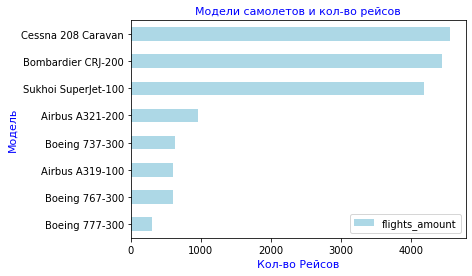

In [9]:
ax = model_qty_reis.sort_values('flights_amount', ascending=True)\
    .plot.barh(x='model', y='flights_amount', color='lightblue')

ax.set_ylabel('Модель', fontsize = 11, color='blue')
ax.set_xlabel('Кол-во Рейсов', fontsize = 11, color='blue')
ax.set_title('Модели самолетов и кол-во рейсов', fontsize = 11, color='blue')

#### Интересно что на Первом месте представлен одномоторный самолет, 
#### 2-3 места небольшие самолеты до 100 пос. мест

Получается что местную потребность (внутри страны) перекрывают в основном небольшие самолеты до 100 посадочных мест, потребность в таких самолетах в 4 раза чаще чем в больших самолетах.
Для более целостной картины можно посмотреть кол-во перевезенных пассажиров

### b) Города - Кол-во рейсов

Text(0.5, 1.0, 'Среднедневное кол-во полетов по городам')

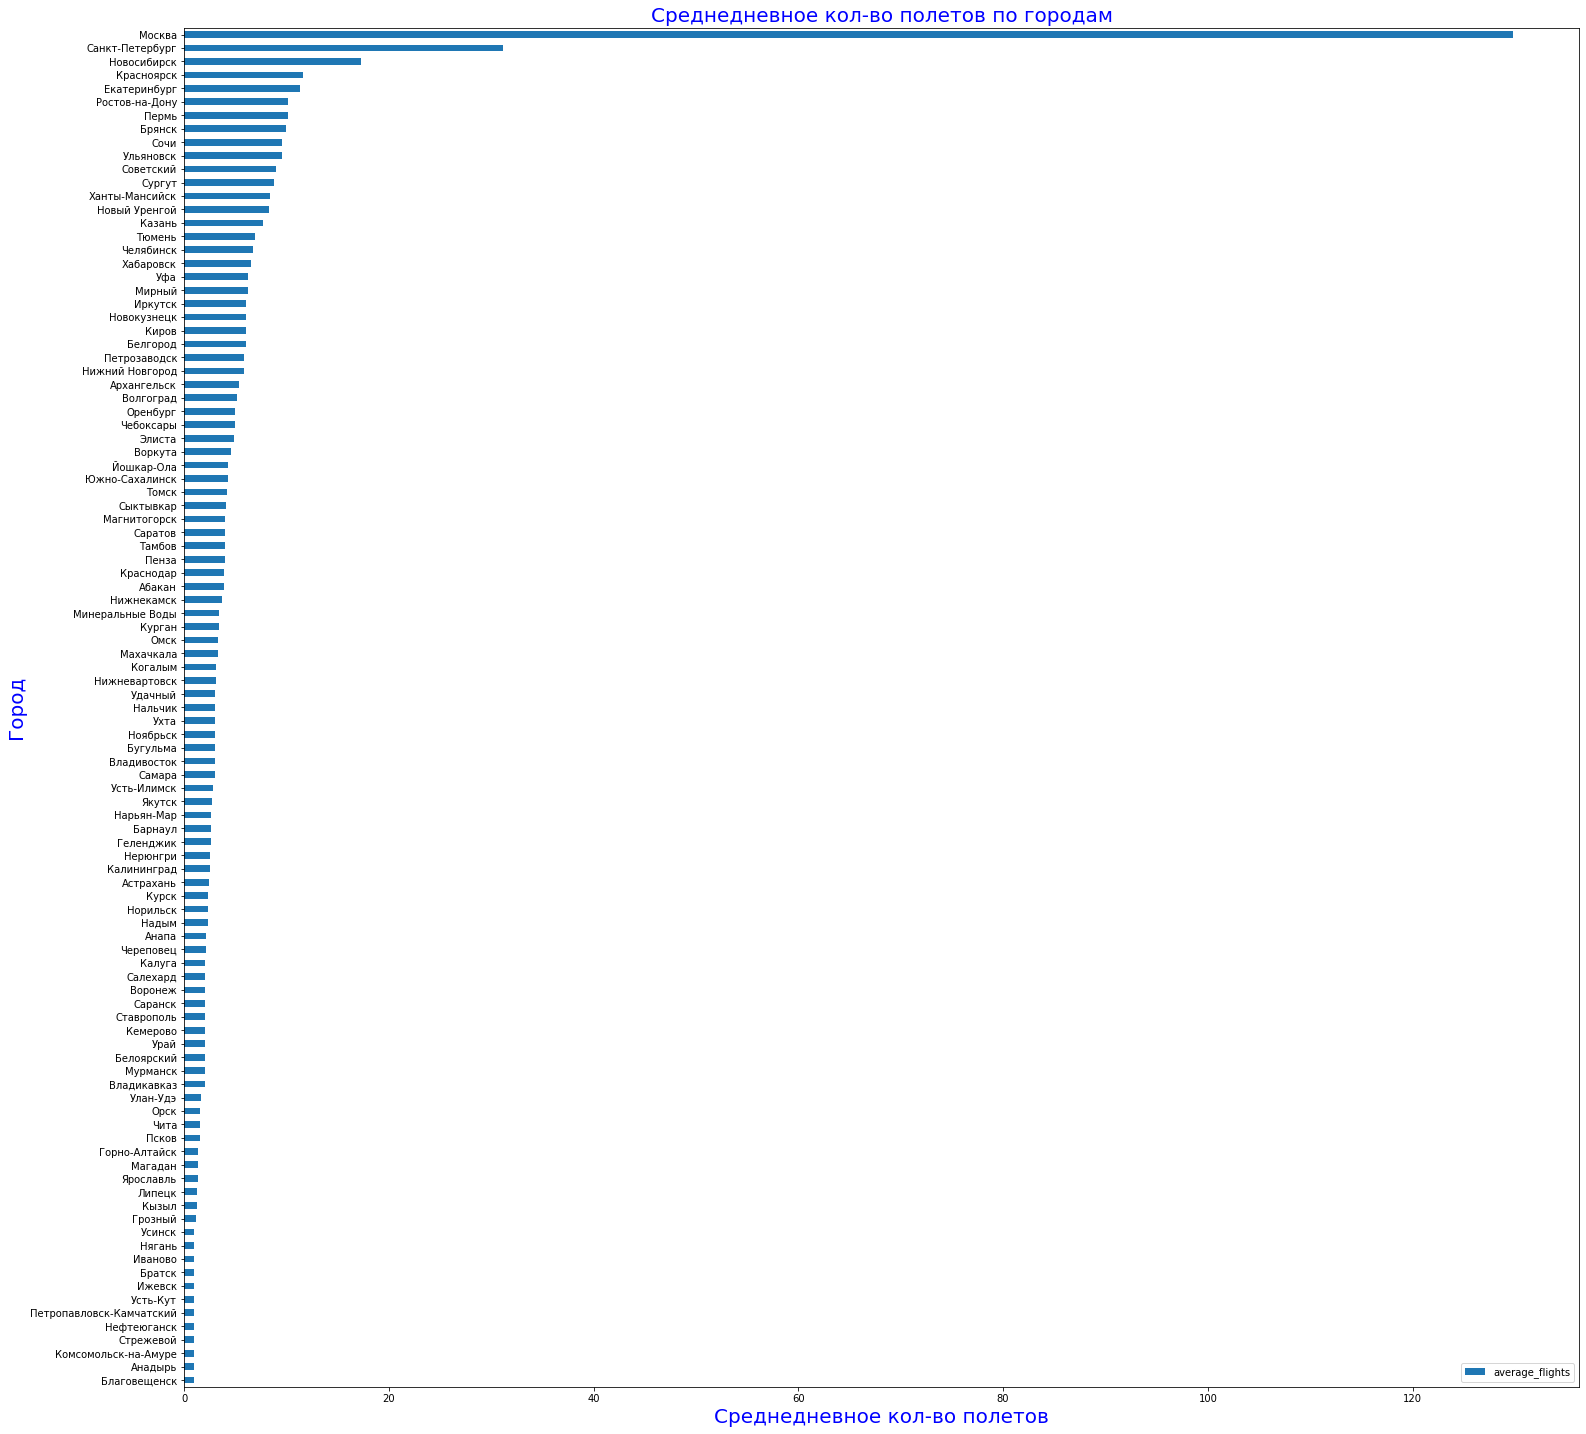

In [10]:
ax=city_avg_day_reis.sort_values('average_flights', ascending=True).plot.barh(x='city', y='average_flights', figsize=(25,25))
ax.set_ylabel('Город', fontsize = 20, color='blue')
ax.set_xlabel('Среднедневное кол-во полетов', fontsize = 20, color='blue')
ax.set_title('Среднедневное кол-во полетов по городам', fontsize = 20, color='blue')

#### Заметно явное превосходство Москвы, распределение кол-ва перелетов явно коррелирует с кол-вом проживающих людей

### c) Посмотрим на ТОП-10 Городов

Text(0.5, 1.0, 'Среднедневное кол-во полетов по городам, ТОП-10')

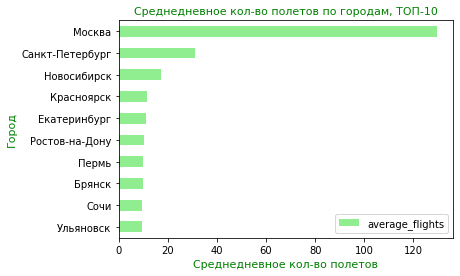

In [11]:
ax = top_10.sort_values('average_flights', ascending=True)\
    .plot.barh(x='city', y='average_flights', color='lightgreen')

ax.set_ylabel('Город', fontsize = 11, color='green')
ax.set_xlabel('Среднедневное кол-во полетов', fontsize = 11, color='green')
ax.set_title('Среднедневное кол-во полетов по городам, ТОП-10', fontsize = 11, color='green')

#### Просто подавляющее превосходство в кол-ве перелетов в Москве.
Даже если просуммировать кол-во перелетов со 2 места по 10-е, то в Москве все равно будет немного больше перелетов 130 vs 121

## Общие итоги:
- Основная потребность в перелетах внутри страны закрывается небольшими самолетами до 100 пассажирских мест
- Чаще всего поднимается в воздух одномоторный самолет Cessna 208 Caravan с 4557 перелетами
- Потребность Москвы в перелетах сильно превалирует над другими городами
- Для полной картины не хватает кол-ва перевезенных пассажиров